In [1]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fun(char):
    '''
    filter function, is used to delete all puntuation
    
    '''
    filters = [' ']
    for i in range(97, 123):
        filters.append(chr(i))
    if char in filters:
        return True
    else:
        return False

def splite_words(string):
    '''
    convert string of article to words
    
    input: string (article)
    
    return: list of words
    '''
    data = to_english(string)
    data = data.lower()
    data = ''.join(filter(fun, data))
    data = data.split()
    
    return data

def to_english(string):
    '''
    convert non english characters to english
    
    input: string that may include non english characters
    
    return: normalized english string
    
    '''
    import unicodedata
    return ''.join(c for c in unicodedata.normalize('NFD', string) if unicodedata.category(c) != 'Mn')


def exclude_frequent_words(original_article, frequent_words):
    '''
    exclude the frequent words from the splitted original article
    
    :param original_article: a list of words from the splitted original articla
    :param frequent_words: a list of chosen frequent_words
    
    return a list of words of the article with frequent words being excluded
    '''
    excluded = []
    for word in original_article:
        if word not in frequent_words:
            excluded.append(word)
    return excluded

In [3]:
# First read in the most commonly used words, so that we can exclude these words in our analysis

df_frequent_words = pd.read_csv('unigram_freq.csv')
df_frequent_words.head()

frequent_words = []
for idx, row in df_frequent_words.iterrows():
    if idx == 210:
        break
    frequent_words.append(row[0])
    
print('First', len(frequent_words), 'most commonly used words:')
print(frequent_words)


First 210 most commonly used words:
['the', 'of', 'and', 'to', 'a', 'in', 'for', 'is', 'on', 'that', 'by', 'this', 'with', 'i', 'you', 'it', 'not', 'or', 'be', 'are', 'from', 'at', 'as', 'your', 'all', 'have', 'new', 'more', 'an', 'was', 'we', 'will', 'home', 'can', 'us', 'about', 'if', 'page', 'my', 'has', 'search', 'free', 'but', 'our', 'one', 'other', 'do', 'no', 'information', 'time', 'they', 'site', 'he', 'up', 'may', 'what', 'which', 'their', 'news', 'out', 'use', 'any', 'there', 'see', 'only', 'so', 'his', 'when', 'contact', 'here', 'business', 'who', 'web', 'also', 'now', 'help', 'get', 'pm', 'view', 'online', 'c', 'e', 'first', 'am', 'been', 'would', 'how', 'were', 'me', 's', 'services', 'some', 'these', 'click', 'its', 'like', 'service', 'x', 'than', 'find', 'price', 'date', 'back', 'top', 'people', 'had', 'list', 'name', 'just', 'over', 'state', 'year', 'day', 'into', 'email', 'two', 'health', 'n', 'world', 're', 'next', 'used', 'go', 'b', 'work', 'last', 'most', 'products',

In [4]:
# Read in the data from all the crawled news areticles, then encode them into a dataframe

pos = 'result_csv/'
files = ['ABC_Business.csv', 'ABC_Politics.csv', 'ABC_US.csv', 'BBC_Business.csv', 'BBC_Politics.csv', 'BBC_US_Canada.csv', 'CNN_Business.csv', 'CNN_Politics.csv', 'CNN_US.csv']

data = pd.DataFrame()
for file in files:
    data = pd.concat([data, pd.read_csv(pos + file)])

articles = []
for idx, row in data.iterrows():
    articles.append(exclude_frequent_words(splite_words(row[2]),frequent_words))

te = TransactionEncoder()
te_ary = te.fit(articles).transform(articles)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [5]:
df.shape

(595, 26093)

In [6]:
df.head()

,aaacheap,aamer,aaron,ab,ababa,abandon,abandoned,abbey,abbott,abboud,...,zola,zolkind,zone,zones,zoo,zoom,zoos,zte,zuckerberg,zurchertwo
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# First trial for applying apriori algorithm, with min_support = 0.05

frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

In [9]:
frequent_itemsets

,support,itemsets
0,0.205042,(abc)
1,0.073950,(ability)
2,0.146218,(able)
3,0.055462,(above)
4,0.075630,(abuse)
...,...,...
198658,0.050420,"(democrats, trumps, presidents, congress, trum..."
198659,0.050420,"(inquiry, trumps, congress, presidents, trump,..."
198660,0.050420,"(inquiry, national, democrats, trumps, trump, ..."
198661,0.050420,"(inquiry, committee, intelligence, report, tru..."


In [10]:
print(frequent_itemsets.iloc[-1][1])

frozenset({'inquiry', 'democrats', 'trumps', 'presidents', 'congress', 'trump', 'political', 'donald', 'president', 'impeachment', 'house'})


In [14]:
print("We found that the runtime of apriori algorithm become considerably large as the size of the maximum frequent itemsets achieve 11, in our data. ")

We found that the runtime of apriori algorithm become considerably large as the size of the maximum frequent itemsets achieve 11, in our data. 


In [12]:
max_itemset = len(frequent_itemsets.iloc[-1][1])

In [13]:
print(max_itemset)

11


In [17]:
# This is the method to choose appropriate min_support, in order to keep the runtime in control.

# We can also set a tolerance value for the size of maximum frequent itemset.
tol = 0

# We choose the starting min_support to be 0.2, which is a very big support threshold in most of the data.
min_support = 0.2

# The loop terminate once the size of maximum frequent itemset get large as we mentioned.
max_itemset = 0
while (11-max_itemset) > tol:
    min_support = min_support-0.01
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    max_itemset = len(frequent_itemsets.iloc[-1][1])
    print("current min_support:", min_support)
    print("current max_itemset:", max_itemset)
    print()
print("Final min_support for our constraint:")
print(min_support)


current min_support: 0.2
current max_itemset: 0

current min_support: 0.19
current max_itemset: 4

current min_support: 0.18
current max_itemset: 4

current min_support: 0.16999999999999998
current max_itemset: 4

current min_support: 0.15999999999999998
current max_itemset: 4

current min_support: 0.14999999999999997
current max_itemset: 4

current min_support: 0.13999999999999996
current max_itemset: 5

current min_support: 0.12999999999999995
current max_itemset: 5

current min_support: 0.11999999999999995
current max_itemset: 5

current min_support: 0.10999999999999996
current max_itemset: 6

current min_support: 0.09999999999999996
current max_itemset: 6

current min_support: 0.08999999999999997
current max_itemset: 7

current min_support: 0.07999999999999997
current max_itemset: 8

current min_support: 0.06999999999999998
current max_itemset: 8

current min_support: 0.05999999999999998
current max_itemset: 9

Final min_support for our constraint:
0.049999999999999975


In [20]:
# Then we try to plot the relationship between the min_support 
# and the largest size of corresponding frequent itemsets

min_support_choices = np.arange(0.3,0,-0.01)
len_max_itemsets = []

for min_support in min_support_choices:
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    if frequent_itemsets.shape[0] != 0:
        max_itemset = len(frequent_itemsets.iloc[-1][1])
    else:
        max_itemset = 0
    len_max_itemsets.append(max_itemset)
    print("current min_support:", min_support)
    print("current max_itemset:", max_itemset)
    print()
    if max_itemset >= 11:
        break
    

current min_support: 0.3
current max_itemset: 2

current min_support: 0.29
current max_itemset: 2

current min_support: 0.27999999999999997
current max_itemset: 3

current min_support: 0.26999999999999996
current max_itemset: 3

current min_support: 0.25999999999999995
current max_itemset: 3

current min_support: 0.24999999999999994
current max_itemset: 3

current min_support: 0.23999999999999994
current max_itemset: 3

current min_support: 0.22999999999999993
current max_itemset: 3

current min_support: 0.21999999999999992
current max_itemset: 3

current min_support: 0.2099999999999999
current max_itemset: 3

current min_support: 0.1999999999999999
current max_itemset: 3

current min_support: 0.1899999999999999
current max_itemset: 4

current min_support: 0.17999999999999988
current max_itemset: 4

current min_support: 0.16999999999999987
current max_itemset: 4

current min_support: 0.15999999999999986
current max_itemset: 4

current min_support: 0.14999999999999986
current max_itemse

In [23]:
print(min_support_choices[:len(len_max_itemsets)])
print(len_max_itemsets)

[0.3  0.29 0.28 0.27 0.26 0.25 0.24 0.23 0.22 0.21 0.2  0.19 0.18 0.17
 0.16 0.15 0.14 0.13 0.12 0.11 0.1  0.09 0.08 0.07 0.06 0.05]
[2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 7, 8, 8, 9, 11]


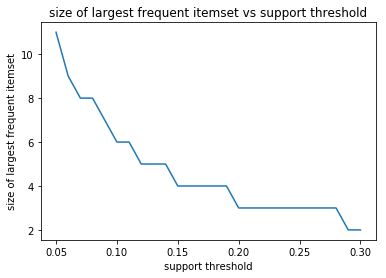

In [24]:
plt.title('size of largest frequent itemset vs support threshold')
plt.xlabel('support threshold')
plt.ylabel('size of largest frequent itemset')
plt.plot(min_support_choices[:len(len_max_itemsets)], len_max_itemsets)


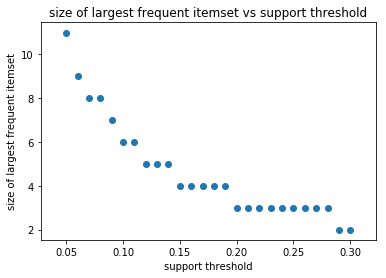

In [25]:
plt.title('size of largest frequent itemset vs support threshold')
plt.xlabel('support threshold')
plt.ylabel('size of largest frequent itemset')
plt.scatter(min_support_choices[:len(len_max_itemsets)], len_max_itemsets)


In [26]:
# Then we try to only investigate in the changing point,
# the points that the size of largest frequent itemset changes as the support threshold decreases

set_support_threshold = []
set_len_max_itemsets = []
for idx in range(0,len(len_max_itemsets)-1):
    if len_max_itemsets[idx] != len_max_itemsets[idx+1]:
        set_support_threshold.append(min_support_choices[idx])
        set_len_max_itemsets.append(len_max_itemsets[idx])
set_support_threshold.append(min_support_choices[len(len_max_itemsets)-1])
set_len_max_itemsets.append(len_max_itemsets[-1])

In [27]:
print(set_support_threshold)
print(set_len_max_itemsets)

[0.29, 0.1999999999999999, 0.14999999999999986, 0.11999999999999983, 0.09999999999999981, 0.0899999999999998, 0.06999999999999978, 0.059999999999999776, 0.04999999999999977]
[2, 3, 4, 5, 6, 7, 8, 9, 11]


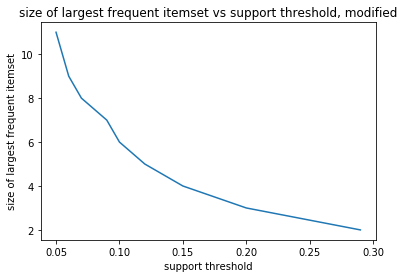

In [28]:
plt.title('size of largest frequent itemset vs support threshold, modified')
plt.xlabel('support threshold')
plt.ylabel('size of largest frequent itemset')
plt.plot(set_support_threshold, set_len_max_itemsets)

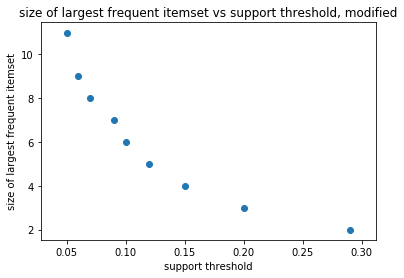

In [29]:
plt.title('size of largest frequent itemset vs support threshold, modified')
plt.xlabel('support threshold')
plt.ylabel('size of largest frequent itemset')
plt.scatter(set_support_threshold, set_len_max_itemsets)

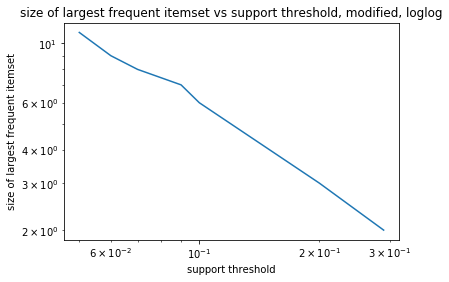

In [30]:
plt.title('size of largest frequent itemset vs support threshold, modified, loglog')
plt.xlabel('support threshold')
plt.ylabel('size of largest frequent itemset')
plt.loglog(set_support_threshold, set_len_max_itemsets)

In [ ]:
# These are the basic processes when choosing the words to applied in following k_means analysis

words_to_choose = []

pos = 'result_csv/'
total_files = ['ABC_Business.csv', 'ABC_Politics.csv', 'ABC_US.csv', 'BBC_Business.csv', 'BBC_Politics.csv', 'BBC_US_Canada.csv', 'CNN_Business.csv', 'CNN_Politics.csv', 'CNN_US.csv']
ss = [0.07, 0.17, 0.07, 0.19, 0.12, 0.25, 0.15, 0.22, 0.15]

for iter_idx in range(9):
    files = [total_files[iter_idx]]

    data = pd.DataFrame()
    for file in files:
        data = pd.concat([data, pd.read_csv(pos + file)])

    articles = []
    for idx, row in data.iterrows():
        articles.append(exclude_frequent_words(splite_words(row[2]),frequent_words))

    te = TransactionEncoder()
    te_ary = te.fit(articles).transform(articles)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = apriori(df, min_support=ss[iter_idx], use_colnames=True)
    words_to_choose.append(list(frequent_itemsets.iloc[-1,1]))
    print(iter_idx)
    print(words_to_choose[iter_idx])
    print()

In [ ]:
# The frequen_itemsets with length = 11 from each different news sources

for iter_idx in range(9):
    print(total_files[iter_idx])
    print(words_to_choose[iter_idx])
    print()

In [ ]:
# These are the finally chosen words for following k_means analysis

['trade', 'tariffs', 'jones', 'trump', 'impeachment', 'china', 'actions', 'investigation', 'according', 'labour']